In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
Fraud_check = pd.read_csv("C:/Users/Sushi/OneDrive/Desktop/ds assignment/assignments/decision tree assignment/Fraud_check.csv")

In [3]:
Fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


 # understanding the data 

In [4]:
Fraud_check.shape

(600, 6)

In [5]:
Fraud_check.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

# data preprocessing

In [6]:
label_encoder = preprocessing.LabelEncoder()
Fraud_check['Marital.Status']= label_encoder.fit_transform(Fraud_check['Marital.Status']) 

In [7]:
Fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,2,68833,50047,10,YES
1,YES,0,33700,134075,18,YES
2,NO,1,36925,160205,30,YES
3,YES,2,50190,193264,15,YES
4,NO,1,81002,27533,28,NO


In [8]:
dummys = pd.get_dummies(Fraud_check.Undergrad)

In [9]:
dummys

,NO,YES
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
595,0,1
596,0,1
597,1,0
598,0,1


In [10]:
merged = pd.concat([Fraud_check,dummys],axis='columns')

In [11]:
merged

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,NO,YES
0,NO,2,68833,50047,10,YES,1,0
1,YES,0,33700,134075,18,YES,0,1
2,NO,1,36925,160205,30,YES,1,0
3,YES,2,50190,193264,15,YES,0,1
4,NO,1,81002,27533,28,NO,1,0
...,...,...,...,...,...,...,...,...
595,YES,0,76340,39492,7,YES,0,1
596,YES,0,69967,55369,2,YES,0,1
597,NO,0,47334,154058,0,YES,1,0
598,YES,1,98592,180083,17,NO,0,1


In [12]:
Fraud_check=merged.drop(['Undergrad','NO'],axis='columns')


In [13]:
Fraud_check

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,YES
0,2,68833,50047,10,YES,0
1,0,33700,134075,18,YES,1
2,1,36925,160205,30,YES,0
3,2,50190,193264,15,YES,1
4,1,81002,27533,28,NO,0
...,...,...,...,...,...,...
595,0,76340,39492,7,YES,1
596,0,69967,55369,2,YES,1
597,0,47334,154058,0,YES,0
598,1,98592,180083,17,NO,1


In [14]:
Fraud_check.rename(columns={'YES':'Undergrad'},inplace=True)

In [15]:
Fraud_check

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Undergrad
0,2,68833,50047,10,YES,0
1,0,33700,134075,18,YES,1
2,1,36925,160205,30,YES,0
3,2,50190,193264,15,YES,1
4,1,81002,27533,28,NO,0
...,...,...,...,...,...,...
595,0,76340,39492,7,YES,1
596,0,69967,55369,2,YES,1
597,0,47334,154058,0,YES,0
598,1,98592,180083,17,NO,1


In [16]:
dummys=pd.get_dummies(Fraud_check.Urban)
dummys

,NO,YES
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
595,0,1
596,0,1
597,0,1
598,1,0


In [17]:
merged = pd.concat([Fraud_check,dummys],axis='columns')

In [18]:
merged

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Undergrad,NO,YES
0,2,68833,50047,10,YES,0,0,1
1,0,33700,134075,18,YES,1,0,1
2,1,36925,160205,30,YES,0,0,1
3,2,50190,193264,15,YES,1,0,1
4,1,81002,27533,28,NO,0,1,0
...,...,...,...,...,...,...,...,...
595,0,76340,39492,7,YES,1,0,1
596,0,69967,55369,2,YES,1,0,1
597,0,47334,154058,0,YES,0,0,1
598,1,98592,180083,17,NO,1,1,0


In [19]:
Fraud_check=merged.drop(['Urban','YES'],axis='columns')


In [20]:
Fraud_check

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad,NO
0,2,68833,50047,10,0,0
1,0,33700,134075,18,1,0
2,1,36925,160205,30,0,0
3,2,50190,193264,15,1,0
4,1,81002,27533,28,0,1
...,...,...,...,...,...,...
595,0,76340,39492,7,1,0
596,0,69967,55369,2,1,0
597,0,47334,154058,0,0,0
598,1,98592,180083,17,1,1


In [21]:
Fraud_check.rename(columns={'NO':'Urban'},inplace=True)

In [22]:
Fraud_check

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad,Urban
0,2,68833,50047,10,0,0
1,0,33700,134075,18,1,0
2,1,36925,160205,30,0,0
3,2,50190,193264,15,1,0
4,1,81002,27533,28,0,1
...,...,...,...,...,...,...
595,0,76340,39492,7,1,0
596,0,69967,55369,2,1,0
597,0,47334,154058,0,0,0
598,1,98592,180083,17,1,1


In [23]:
Fraud_check['Taxable.Income']=Fraud_check['Taxable.Income'].map(lambda x:'risky' if x<30000 else 'good')

In [24]:
Fraud_check

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad,Urban
0,2,good,50047,10,0,0
1,0,good,134075,18,1,0
2,1,good,160205,30,0,0
3,2,good,193264,15,1,0
4,1,good,27533,28,0,1
...,...,...,...,...,...,...
595,0,good,39492,7,1,0
596,0,good,55369,2,1,0
597,0,good,154058,0,0,0
598,1,good,180083,17,1,1


# converting data in x and y 

In [25]:
X = Fraud_check.drop("Taxable.Income",axis=1)   #Feature Matrix
y=Fraud_check['Taxable.Income']

In [26]:
X

,Marital.Status,City.Population,Work.Experience,Undergrad,Urban
0,2,50047,10,0,0
1,0,134075,18,1,0
2,1,160205,30,0,0
3,2,193264,15,1,0
4,1,27533,28,0,1
...,...,...,...,...,...
595,0,39492,7,1,0
596,0,55369,2,1,0
597,0,154058,0,0,0
598,1,180083,17,1,1


In [27]:
y

0      good
1      good
2      good
3      good
4      good
       ... 
595    good
596    good
597    good
598    good
599    good
Name: Taxable.Income, Length: 600, dtype: object

# converting data into train-test-split

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=12)

# fitting data into model

In [29]:
dt_model=DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

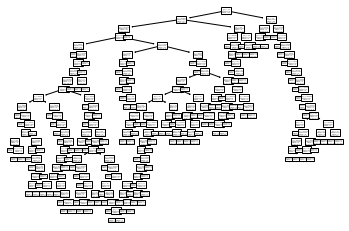

In [30]:
tree.plot_tree(dt_model);


In [31]:
y_train_pred=dt_model.predict(X_train)

In [32]:
y_test_pred=dt_model.predict(X_test)

# checking train accuracy 

In [33]:
accuracy_score(y_train,y_train_pred)

1.0

In [34]:
confusion_matrix(y_train,y_train_pred)

array([[369,   0],
       [  0, 111]], dtype=int64)

# checking accuracy for test  for test data 

In [35]:
accuracy_score(y_test,y_test_pred)


0.6833333333333333

In [36]:
confusion_matrix(y_test,y_test_pred)

array([[78, 29],
       [ 9,  4]], dtype=int64)

### after comparing train accuracy and test accuracy , i got know the model for over fit , by using GRID SEARCH CV method trying to improve model


In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
gridsearch=GridSearchCV(estimator=dt_model,param_grid={'max_depth':[3,4,5,6]},cv=None,)
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [3, 4, 5, 6]})

In [39]:
gridsearch.best_params_

{'max_depth': 3}

## applying gridsearch cv for dt

In [40]:
gridsearch=DecisionTreeClassifier(criterion='entropy',max_depth=3)
gridsearch.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

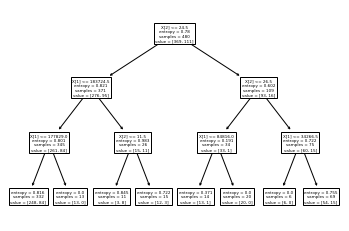

In [41]:
tree.plot_tree(gridsearch);


In [42]:
y_train_pred=gridsearch.predict(X_train)

In [43]:
y_train_pred

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
    

In [44]:
confusion_matrix(y_train,gridsearch.predict(X_train))

array([[366,   3],
       [103,   8]], dtype=int64)

In [45]:
accuracy_score(y_train,y_train_pred)

0.7791666666666667

###  checking accuracy for test  for test data 

In [46]:
y_test_pred_1=gridsearch.predict(X_test)

In [47]:
y_test_pred_1

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good',
       'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good',
 

In [48]:
confusion_matrix(y_test,gridsearch.predict(X_test))

array([[102,   5],
       [ 13,   0]], dtype=int64)

In [49]:
accuracy_score(y_test,y_test_pred_1)

0.85

# checking acutal value & predicated value

In [50]:
final=pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
final

,Actual,Predicted
326,risky,good
360,good,good
348,good,good
567,risky,good
244,good,good
...,...,...
554,good,good
472,good,good
540,risky,risky
531,good,good


# decision tree assignment 2 


In [51]:
company = pd.read_csv("C:/Users/Sushi/OneDrive/Desktop/ds assignment/assignments/decision tree assignment/Company_Data.csv")

In [52]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [53]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [54]:
company['ShelveLoc']=company['ShelveLoc'].astype('category')
company['Urban']=company['Urban'].astype('category')
company['US']=company['ShelveLoc'].astype('category')

company.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
dtype: object

In [55]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Bad
1,11.22,111,48,16,260,83,Good,65,10,Yes,Good
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Medium
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,Bad


In [56]:
label_encoder = preprocessing.LabelEncoder()
company['US']= label_encoder.fit_transform(company['US']) 

In [57]:
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 

In [58]:
dummys=pd.get_dummies(company.Urban)
dummys

,No,Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
395,0,1
396,1,0
397,0,1
398,0,1


In [59]:
merged = pd.concat([Fraud_check,dummys],axis='columns')
merged


,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad,Urban,No,Yes
0,2,good,50047,10,0,0,0.0,1.0
1,0,good,134075,18,1,0,0.0,1.0
2,1,good,160205,30,0,0,0.0,1.0
3,2,good,193264,15,1,0,0.0,1.0
4,1,good,27533,28,0,1,0.0,1.0
...,...,...,...,...,...,...,...,...
595,0,good,39492,7,1,0,NaN,NaN
596,0,good,55369,2,1,0,NaN,NaN
597,0,good,154058,0,0,0,NaN,NaN
598,1,good,180083,17,1,1,NaN,NaN


In [60]:

merged = pd.concat([company,dummys],axis='columns')

In [61]:
merged

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,No,Yes
0,9.50,138,73,11,276,120,0,42,17,Yes,0,0,1
1,11.22,111,48,16,260,83,1,65,10,Yes,1,0,1
2,10.06,113,35,10,269,80,2,59,12,Yes,2,0,1
3,7.40,117,100,4,466,97,2,55,14,Yes,2,0,1
4,4.15,141,64,3,340,128,0,38,13,Yes,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,Yes,1,0,1
396,6.14,139,23,3,37,120,2,55,11,No,2,1,0
397,7.41,162,26,12,368,159,2,40,18,Yes,2,0,1
398,5.94,100,79,7,284,95,0,50,12,Yes,0,0,1


In [62]:
company=merged.drop(['Urban','Yes'],axis='columns')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,US,No
0,9.50,138,73,11,276,120,0,42,17,0,0
1,11.22,111,48,16,260,83,1,65,10,1,0
2,10.06,113,35,10,269,80,2,59,12,2,0
3,7.40,117,100,4,466,97,2,55,14,2,0
4,4.15,141,64,3,340,128,0,38,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,0
396,6.14,139,23,3,37,120,2,55,11,2,1
397,7.41,162,26,12,368,159,2,40,18,2,0
398,5.94,100,79,7,284,95,0,50,12,0,0


In [63]:
company['Sales']=company['Sales'].map(lambda x:1 if x>8 else 0)
company['Sales']

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: int64

In [64]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,US,No
0,1,138,73,11,276,120,0,42,17,0,0
1,1,111,48,16,260,83,1,65,10,1,0
2,1,113,35,10,269,80,2,59,12,2,0
3,0,117,100,4,466,97,2,55,14,2,0
4,0,141,64,3,340,128,0,38,13,0,0


In [65]:
X=company.drop(labels='Sales',axis=1)
y=company[['Sales']]

In [66]:
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,US,No
0,138,73,11,276,120,0,42,17,0,0
1,111,48,16,260,83,1,65,10,1,0
2,113,35,10,269,80,2,59,12,2,0
3,117,100,4,466,97,2,55,14,2,0
4,141,64,3,340,128,0,38,13,0,0


In [67]:
y.head()

,Sales
0,1
1,1
2,1
3,0
4,0


In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=12)

# model buliding 

In [69]:
dt_model=DecisionTreeClassifier(criterion='gini',max_depth=10)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [70]:
y_train_pred=dt_model.predict(X_train)

In [71]:
y_test_pred=dt_model.predict(X_test)

# checking  matrix

In [72]:
accuracy_score(y_train,y_train_pred)

0.99375

In [73]:
confusion_matrix(y_train,y_train_pred)

array([[187,   0],
       [  2, 131]], dtype=int64)

# checking accuracy for test data 

In [74]:

accuracy_score(y_test,y_test_pred)

0.6375

In [75]:
confusion_matrix(y_test,y_test_pred)

array([[34, 15],
       [14, 17]], dtype=int64)